# Bag of n_grams


In [1]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])

v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

Created bag of 1 word and bag of 2 words

In [7]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])

v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

Creating bag of 1 word, 2 words and 3 words

In [8]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])

v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

We will  take a simple collection of text documents, preprocess them to **remove stop words**, **lemmatize** etc and then **generate bag** of 1 grams and 2 grams from it

In [10]:
#sample
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [14]:
import spacy

nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    
    doc=nlp(text)
    
    filtered_tokens=[]
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)
            

In [15]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [16]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [17]:
corpus_processed=[preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [18]:
 v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

Now generate bag of n gram vector for few sample documents

In [21]:
v.transform(['Thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [22]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

## News Category Classification Problem

Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1.BUSINESS
<br>
2.SPORTS
<br>
3.CRIME
<br>
4.SCIENCE

In [26]:
df=pd.read_json("10_news_dataset.json")
print(df.shape)

(12695, 2)


In [27]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [28]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

## Handle class imbalance




In [29]:
min_sample=1381

df_business=df[df.category=="BUSINESS"].sample(min_sample,random_state=2023)
df_sports=df[df.category=="SPORTS"].sample(min_sample,random_state=2023)
df_crime=df[df.category=="CRIME"].sample(min_sample,random_state=2023)
df_science=df[df.category=="SCIENCE"].sample(min_sample,random_state=2023)

In [32]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

### Convert text to a category number

In [38]:
target={'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3}

df_balanced['category_num']=df_balanced['category'].map(target)

df_balanced.head()

,text,category,category_num
11110,Why Trendspotting Still Matters: The Power of ...,BUSINESS,0
6472,Software That Helps Travelers and Companies Se...,BUSINESS,0
7863,The Secret to Greater Success Is... Learning H...,BUSINESS,0
7920,Megyn Kelly Has The Perfect One-Word Response ...,BUSINESS,0
5459,How to Find Your Next Super Star Employee The ...,BUSINESS,0


## Model without preprocessing


In [43]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num #same ratio of class for training
)


In [44]:
print(X_train.shape)
X_train.head()

(4419,)


9999    This Game Can Make People Less Prejudiced. Her...
9010       The Beautiful Things Music Does To Your Brain 
6906    Olympic Doping Bans On 28 Russian Athletes Ove...
3060    Judge Says Defense In Freddy Gray Case Can Rel...
3445    2 New York Detectives Charged In Alleged Rape ...
Name: text, dtype: object

In [45]:
y_train.value_counts()


3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [46]:
y_test.value_counts()


1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,1))),
            ('Multi NB',MultinomialNB())])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       276
           1       0.91      0.83      0.87       277
           2       0.89      0.87      0.88       276
           3       0.90      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



BUSINESS: 0<br>
SPORTS: 1<br>
CRIME: 2<br>
SCIENCE: 3<br>

In [50]:
x_test[:5]

6769    Amazon Says It Plans To Add 100,000 Jobs Most ...
6818    Mother And Calf Of Elusive Whale Species Froli...
2334    Scientists Confirm That Some Spiders Can Prett...
8886    How to Become a Connective Leader Who Fosters ...
645     Video Shows Man Holding Gun Before Allegedly S...
Name: text, dtype: object

In [51]:
y_pred[:5]

array([0, 3, 3, 0, 2])

### Attempt 2 : Use 1-gram and bigrams

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,2))),
            ('Multi NB',MultinomialNB())])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.91      0.78       276
           1       0.93      0.80      0.86       277
           2       0.89      0.88      0.88       276
           3       0.92      0.76      0.83       276

    accuracy                           0.84      1105
   macro avg       0.86      0.84      0.84      1105
weighted avg       0.86      0.84      0.84      1105



Attempt 1 f1-score is better as compared to Attempt-2


### Attempt 3 : Use 1-gram to trigrams

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,3))),
            ('Multi NB',MultinomialNB())])
#2. fit with X_train and y_train
clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.92      0.78       276
           1       0.93      0.80      0.86       277
           2       0.90      0.88      0.89       276
           3       0.93      0.75      0.83       276

    accuracy                           0.84      1105
   macro avg       0.86      0.84      0.84      1105
weighted avg       0.86      0.84      0.84      1105



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [55]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [56]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11110,Why Trendspotting Still Matters: The Power of ...,BUSINESS,0,Trendspotting matter Power look Forward archai...
6472,Software That Helps Travelers and Companies Se...,BUSINESS,0,software help Travelers company Selling Travel...
7863,The Secret to Greater Success Is... Learning H...,BUSINESS,0,Secret Greater Success learn sell important su...
7920,Megyn Kelly Has The Perfect One-Word Response ...,BUSINESS,0,Megyn Kelly Perfect Word Response Donald Trump...
5459,How to Find Your Next Super Star Employee The ...,BUSINESS,0,find Super Star Employee pace talent scouting ...


### Build a model with pre processed text

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [58]:
print(X_train.shape)
X_train.head()

(4419,)


9999            Game People Prejudiced work know try work
9010                         Beautiful Things Music brain
6906    Olympic Doping Bans 28 russian Athletes overtu...
3060    Judge say Defense Freddy Gray Case release Evi...
3445    2 New York detective charge alleged rape 18 ye...
Name: preprocessed_txt, dtype: object

In [59]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       276
           1       0.93      0.86      0.89       277
           2       0.84      0.93      0.88       276
           3       0.92      0.83      0.87       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

#### Plot confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[248,   7,  13,   8],
       [ 14, 237,  22,   4],
       [ 11,   2, 256,   7],
       [ 25,   9,  13, 229]])

Text(70.72222222222221, 0.5, 'Truth')

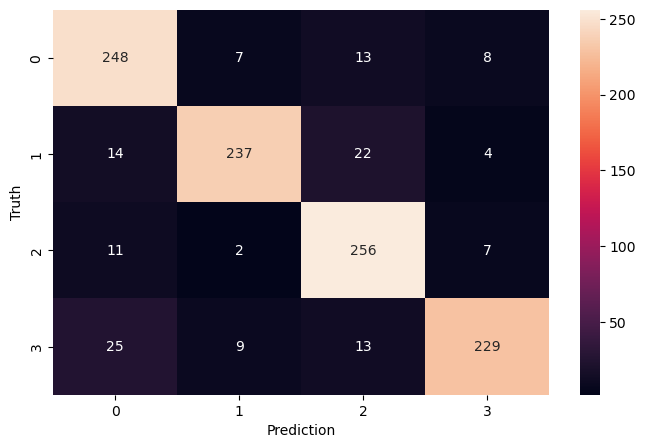

In [62]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')